# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

# Data Munging

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# read in data files
d1 = pd.read_csv('audit_risk.csv')
d2 = pd.read_csv('trial.csv')

In [2]:
# shape and column names for the data
print(d1.shape,'\n',d2.shape,'\n')
print(list(d1),'\n\n',list(d2))

(776, 27) 
 (776, 18) 

['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'] 

 ['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk']


- Removing columns that are exactly the same or highly correlated
- Removing common columns between two datasets

In [3]:
print('Sector_score: ',sum(d1['Sector_score']==d2['Sector_score']))
print('LOCATION_ID: ',sum(d1['LOCATION_ID']==d2['LOCATION_ID']))
print('PARA_A: ',sum(d1['PARA_A']==d2['PARA_A']))
print('Score_A: ',sum(d1['Score_A']==d2['SCORE_A']))
print('PARA_B: ',sum(d1['PARA_B']==d2['PARA_B']))
print('Score_B: ',sum(d1['Score_B']==d2['SCORE_B']))
print('TOTAL: ',sum(d1['TOTAL']==d2['TOTAL']))
print('numbers: ',sum(d1['numbers']==d2['numbers']))
print('Money_Value: ',sum(d1['Money_Value']==d2['Money_Value']))
print('History: ',sum(d1['History']==d2['History']))
print('Score: ',sum(d1['Score']==d2['Score']))
print('Risk: ',sum(d1['Risk']==d2['Risk']))

Sector_score:  776
LOCATION_ID:  776
PARA_A:  776
Score_A:  0
PARA_B:  776
Score_B:  0
TOTAL:  776
numbers:  776
Money_Value:  775
History:  776
Score:  776
Risk:  595


In [4]:
x = (d1['Money_Value']==d2['Money_Value'])
l = x[x==False]
l

642    False
Name: Money_Value, dtype: bool

In [5]:
print(d1['Money_Value'].loc[[642]])
print(d2['Money_Value'].loc[[642]])

642   NaN
Name: Money_Value, dtype: float64
642   NaN
Name: Money_Value, dtype: float64


In [6]:
d2 = d2.drop(['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','History','Score'],axis=1)

In [7]:
print(list(d1),'\n')
print(list(d2))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'] 

['SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk']


In [8]:
print('Score_B: ',sum(d1['Score_B']==d1['Score_B.1']))
print('Score_B: ',sum(d2['SCORE_B']==d1['Score_B.1']))

Score_B:  523
Score_B:  0


#### Assuming data integrity for audit_risk file to be higher than trial file and removing the following columns from trial based on that fact
##### - Score_A, Score_B, Risk

In [9]:
d2 = d2.drop(['SCORE_A','SCORE_B','Risk'],axis=1)

In [10]:
d2.shape

(776, 6)

#### Combining the two datasets

In [11]:
raw_data = pd.concat([d1,d2],axis=1)

In [12]:
raw_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.572680,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.444581,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


#### Finding and removing rows with NA NaN values
##### removing detection risk as it has a single value for all rows

In [13]:
raw_data = raw_data.drop(['Detection_Risk'],axis=1)

In [14]:
raw_data.isnull().values.any()

True

In [15]:
a = np.array(raw_data.isnull().sum())
np.where(a > 0)

(array([12], dtype=int64),)

In [16]:
raw_data[raw_data.columns[12]].describe(include='all')

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [17]:
raw_data = raw_data.dropna()

In [18]:
raw_data.shape

(775, 32)

In [19]:
raw_data[pd.to_numeric(raw_data['LOCATION_ID'], errors='coerce').isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
351,1.99,LOHARU,0.30,0.2,0.060,0.0,0.2,0.0,0.30,5.0,...,1.460,0.4,0.2920,0,2,2,2,0,2,2
355,1.99,NUH,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,1.644,0.4,0.3288,0,2,2,2,0,2,2
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,1.590,0.4,0.3180,0,2,2,2,0,2,2


In [20]:
location = raw_data.LOCATION_ID.unique()

In [21]:
location

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

#### Replacing non-numeric location values with missing numeric factors

In [22]:
numb= np.array(['1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '5', '6', '7', '8', '9'])
numb = numb.astype(int)
numb.sort()
numb

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44])

##### 10,26,45 are missing

In [23]:
raw_data.loc[raw_data.LOCATION_ID == 'LOHARU', 'LOCATION_ID'] = 10
raw_data.loc[raw_data.LOCATION_ID == 'NUH', 'LOCATION_ID'] = 26
raw_data.loc[raw_data.LOCATION_ID == 'SAFIDON', 'LOCATION_ID'] = 45

In [24]:
raw_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,20.138877,2.453059,0.351484,1.352712,10.813924,0.313290,6.342181,13.235241,5.067742,0.223742,...,17.701560,0.572903,7.177034,0.393548,2.237419,2.910968,2.505806,0.029677,2.061935,2.167742
std,24.301417,5.681977,0.174082,3.442348,50.114461,0.169865,30.091403,51.343841,0.264608,0.080399,...,54.772482,0.444825,38.691674,0.488852,0.803991,1.598148,1.229338,0.184396,0.375316,0.680281
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,0.200000,...,1.584000,0.400000,0.316800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.370000,5.000000,0.200000,...,2.214000,0.400000,0.556000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.887000,7.725000,5.000000,0.200000,...,10.703000,0.400000,3.252600,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [25]:
raw_data.columns = map(str.lower, raw_data.columns)
print(raw_data.shape)

(775, 32)


##### creating feature and target splits

In [26]:
x = raw_data.drop(['audit_risk','risk'],axis=1)
y_reg = raw_data['audit_risk']
y_class = raw_data['risk']

#### removing highly correlated variables
#### setting correlation threshold to 0.8

In [27]:
x.corr()

,sector_score,para_a,score_a,risk_a,para_b,score_b,risk_b,total,numbers,score_b.1,...,risk_f,score,inherent_risk,control_risk,marks,money_marks,district,loss,loss_score,history_score
sector_score,1.000000,-0.216406,-0.424352,-0.218631,-0.132450,-0.218075,-0.130376,-0.153056,-0.151573,-0.170092,...,-0.103036,-0.336394,-0.172967,-0.154446,-0.170092,-0.318342,-0.107588,-0.082966,-0.086560,-0.136629
para_a,-0.216406,1.000000,0.496532,0.999267,0.161852,0.358352,0.161748,0.266952,0.133676,0.140521,...,0.103904,0.426472,0.481784,0.149032,0.140521,0.285791,0.127622,0.045317,0.043629,0.172534
score_a,-0.424352,0.496532,1.000000,0.504746,0.249325,0.572351,0.248079,0.297420,0.242533,0.274412,...,0.150805,0.720233,0.320762,0.170536,0.274412,0.478570,0.088253,0.093211,0.093510,0.265185
risk_a,-0.218631,0.999267,0.504746,1.000000,0.165202,0.362783,0.165060,0.270135,0.135506,0.142979,...,0.106487,0.432332,0.483218,0.150616,0.142979,0.290560,0.127196,0.045792,0.043659,0.176061
para_b,-0.132450,0.161852,0.249325,0.165202,1.000000,0.347493,0.999936,0.994101,0.209799,0.230789,...,0.196009,0.397111,0.654427,0.186625,0.230789,0.314464,0.082841,0.044771,0.042507,0.316494
score_b,-0.218075,0.358352,0.572351,0.362783,0.347493,1.000000,0.348081,0.379242,0.277447,0.313651,...,0.171172,0.901220,0.365532,0.127542,0.313651,0.567383,-0.005010,0.098761,0.092453,0.309393
risk_b,-0.130376,0.161748,0.248079,0.165060,0.999936,0.348081,1.000000,0.994023,0.209541,0.230486,...,0.195254,0.396908,0.654480,0.186327,0.230486,0.313008,0.083029,0.045067,0.042833,0.316329
total,-0.153056,0.266952,0.297420,0.270135,0.994101,0.379242,0.994023,1.000000,0.217576,0.238164,...,0.202114,0.433766,0.689743,0.197219,0.238164,0.337366,0.093221,0.048813,0.046419,0.326342
numbers,-0.151573,0.133676,0.242533,0.135506,0.209799,0.277447,0.209541,0.217576,1.000000,0.908132,...,0.202340,0.502795,0.271044,0.228560,0.908132,0.446590,0.124893,-0.001538,0.035755,0.209534
score_b.1,-0.170092,0.140521,0.274412,0.142979,0.230789,0.313651,0.230486,0.238164,0.908132,1.000000,...,0.223293,0.565941,0.308465,0.256442,1.000000,0.507166,0.150237,0.004700,0.036839,0.248353


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
corr = x.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
corr_matrix = x.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
district_loss,district,1.000000
prob,loss_score,1.000000
score_mv,money_marks,1.000000
score_b.1,marks,1.000000
prob,history_score,1.000000
money_value,risk_d,0.999936
para_b,risk_b,0.999936
para_a,risk_a,0.999267
para_b,total,0.994101
risk_b,total,0.994023


#### dropping highest correlations and repeating corr matrix evaluation

In [30]:
x = x.drop(['district','loss_score','money_marks','marks','history_score'],axis=1)
corr_matrix = x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
money_value,risk_d,0.999936
para_b,risk_b,0.999936
para_a,risk_a,0.999267
para_b,total,0.994101
risk_b,total,0.994023
history,risk_f,0.991987
score_b.1,risk_c,0.990411
prob,loss,0.981509
numbers,risk_c,0.955300
district_loss,risk_e,0.913458


In [31]:
x = x.drop(['para_a','para_b','score_b.1'],axis=1)
corr_matrix = x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
money_value,risk_d,0.999936
risk_b,total,0.994023
history,risk_f,0.991987
prob,loss,0.981509
numbers,risk_c,0.955300
district_loss,risk_e,0.913458
score_b,score,0.901220
history,prob,0.859289
money_value,inherent_risk,0.829743
risk_d,inherent_risk,0.829516


In [32]:
x = x.drop(['money_value','total','history'],axis=1)
corr_matrix = x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
prob,loss,0.981509
numbers,risk_c,0.955300
district_loss,risk_e,0.913458
score_b,score,0.901220
risk_d,inherent_risk,0.829516
prob,risk_f,0.815603


In [33]:
x = x.drop(['loss','numbers','district_loss','score'],axis=1)
corr_matrix = x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
risk_d,inherent_risk,0.829516
prob,risk_f,0.815603


In [34]:
x = x.drop(['inherent_risk','prob'],axis=1)
corr_matrix = x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr


In [35]:
x.shape

(775, 12)

In [45]:
x.to_csv('finaldataset.csv',index=False)
y_reg.to_csv('y_reg.csv',index=False)
y_class.to_csv('y_class.csv',index=False)
raw_data.to_csv('finaldata.csv',index=False)

In [46]:
x.head()

,sector_score,location_id,score_a,risk_a,score_b,risk_b,risk_c,score_mv,risk_d,risk_e,risk_f,control_risk
0,3.89,23,0.6,2.508,0.2,0.500,1.0,0.2,0.676,0.4,0.0,0.4
1,3.89,6,0.2,0.000,0.2,0.966,1.0,0.2,0.188,0.4,0.0,0.4
2,3.89,6,0.2,0.102,0.2,0.046,1.0,0.2,0.000,0.4,0.0,0.4
3,3.89,6,0.2,0.000,0.6,6.480,3.6,0.6,7.050,0.4,0.0,0.4
4,3.89,6,0.2,0.000,0.2,0.016,1.0,0.2,0.000,0.4,0.0,0.4


#### making train test splits and scaling the data
#### using min max scaling as the data is non-gaussian

In [37]:
from sklearn.model_selection import train_test_split

# default is 75% / 25% train-test split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x,  y_reg, random_state=0)
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x, y_class, random_state=0)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_reg = scaler.fit_transform(x_train_reg)
x_test_reg = scaler.transform(x_test_reg)

x_train_class = scaler.fit_transform(x_train_class)
x_test_class = scaler.transform(x_test_class)

# Classification models

## k nearest neighbors

In [114]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train_class, y_train_class)
    train_score_array.append(knn.score(x_train_class, y_train_class))
    test_score_array.append(knn.score(x_test_class, y_test_class))

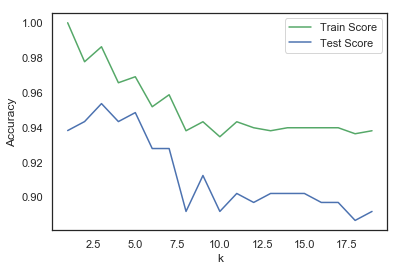

In [115]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [116]:
knn = KNeighborsClassifier(3)
knn.fit(x_train_class, y_train_class)
print('Train score: {:.4f}'.format(knn.score(x_train_class, y_train_class)))
print('Test score: {:.4f}'.format(knn.score(x_test_class, y_test_class)))

Train score: 0.9862
Test score: 0.9536


In [117]:
from sklearn.metrics import roc_auc_score

y_knn_predict = knn.predict(x_test_class)
y_knn_train_predict = knn.predict(x_train_class)
print('Train roc_auc_score: %.4f'%roc_auc_score(y_knn_train_predict, y_train_class))
print('Test roc_auc_score: %.4f '%roc_auc_score(y_knn_predict, y_test_class))

y_predicted = knn.predict(x_test_class)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n KNN classifier on test data\n', confusion )

Train roc_auc_score: 0.9871
Test roc_auc_score: 0.9640 

 KNN classifier on test data
 [[116   0]
 [  9  69]]


#### knn at k=3
#### Train score: 0.9871
#### Test score: 0.9640

## Logistic Regression

In [118]:
y_class.sum()/len(y_class)

0.3935483870967742

In [119]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(x_train_class, y_train_class)
    log_l2.fit(x_train_class, y_train_class)
    train_score_l1.append(log_l1.score(x_train_class, y_train_class))
    train_score_l2.append(log_l2.score(x_train_class, y_train_class))
    test_score_l1.append(log_l1.score(x_test_class, y_test_class))
    test_score_l2.append(log_l2.score(x_test_class, y_test_class))

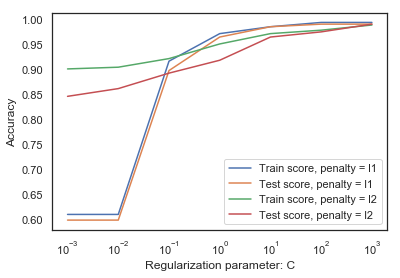

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [121]:
y_log_predict = log_l1.predict(x_test_class)
y_log_train_predict = log_l1.predict(x_train_class)
print('Train roc_auc_score: %.4f'%roc_auc_score(y_log_train_predict, y_train_class))
print('Test roc_auc_score: %.4f '%roc_auc_score(y_log_predict, y_test_class))

y_predicted = log_l1.predict(x_test_class)
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Logistic regression classifier on test data (default settings)\n', confusion )


Train roc_auc_score: 0.9928
Test roc_auc_score: 0.9915 

 Logistic regression classifier on test data (default settings)
 [[116   0]
 [  2  76]]


#### L1 at c=100

## Support Vector Classifier

In [122]:
from sklearn.svm import SVC
c_range = [0.001,0.01,0.1,1,2,4,10,20,40,80,100]
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c)
    clf.fit(x_train_class,y_train_class)
    train_score.append(clf.score(x_train_class, y_train_class))
    test_score.append(clf.score(x_test_class, y_test_class))

Text(0, 0.5, 'Accuracy')

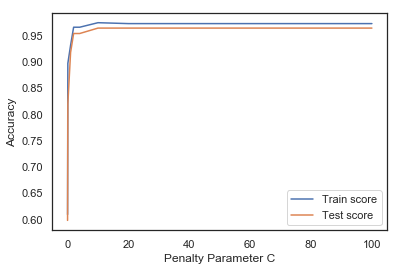

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

In [124]:
y_linsvc_predict = clf.predict(x_test_class)
y_linsvc_train_predict = clf.predict(x_train_class)
print('Train roc_auc_score: %.4f'%roc_auc_score(y_linsvc_train_predict, y_train_class))
print('Test roc_auc_score: %.4f '%roc_auc_score(y_linsvc_predict, y_test_class))

y_predicted = clf.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Linear SVC on test data \n', confusion )

Train roc_auc_score: 0.9726
Test roc_auc_score: 0.9715 

 Linear SVC on test data 
 [[116   0]
 [  7  71]]


#### c=10 best penalty param

In [125]:
print(max(train_score))
print(max(test_score))
print(test_score[10])

0.9741824440619621
0.9639175257731959
0.9639175257731959


## Kerenilzed Support Vector Machine


 Linear Kernelized SVM on test data
 [[116   0]
 [  3  75]]


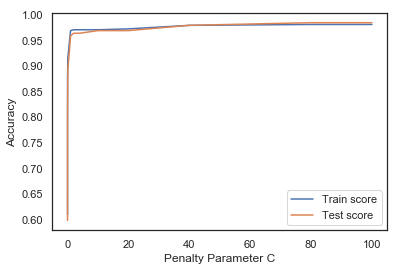

In [126]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='linear')
    clf.fit(x_train_class,y_train_class)
    train_score.append(clf.score(x_train_class, y_train_class))
    test_score.append(clf.score(x_test_class, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Linear Kernelized SVM on test data\n', confusion )


 Sigmoid Kernelized SVM on test data
 [[116   0]
 [  7  71]]


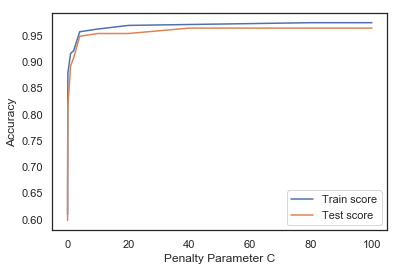

In [127]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='sigmoid')
    clf.fit(x_train_class,y_train_class)
    train_score.append(clf.score(x_train_class, y_train_class))
    test_score.append(clf.score(x_test_class, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Sigmoid Kernelized SVM on test data\n', confusion )


 RBF Kernelized SVM on test data
 [[116   0]
 [  7  71]]


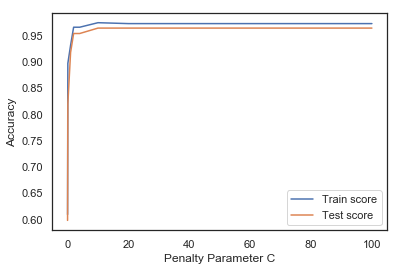

In [128]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(x_train_class,y_train_class)
    train_score.append(clf.score(x_train_class, y_train_class))
    test_score.append(clf.score(x_test_class, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n RBF Kernelized SVM on test data\n', confusion )


 Poly Kernelized SVM on test data
 [[116   0]
 [ 42  36]]


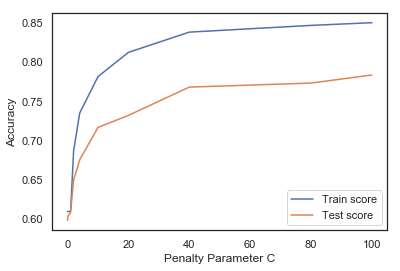

In [129]:
train_score = []
test_score = []

for c in c_range:
    clf = SVC(gamma='auto',C=c,kernel='poly',degree=4)
    clf.fit(x_train_class,y_train_class)
    train_score.append(clf.score(x_train_class, y_train_class))
    test_score.append(clf.score(x_test_class, y_test_class))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Penalty Parameter C')
plt.ylabel('Accuracy')

y_predicted = clf.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Poly Kernelized SVM on test data\n', confusion )

### Gridsearch Kernelized SVM

In [130]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
param_grid = {'C':[0.1, 1, 10,100], 'gamma': [0.01, 0.1, 1, 10,100]}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_svc.fit(x_train_class, y_train_class)
print("Best parameters: {}".format(grid_svc.best_params_))

Best parameters: {'C': 100, 'gamma': 0.1}


In [131]:
print('Train score: {:.4f}'.format(grid_svc.score(x_train_class,y_train_class)))
print('Test score: {:.4f}'.format(grid_svc.score(x_test_class, y_test_class)))
print('Mean Train Score',grid_svc.cv_results_['mean_train_score'])
print('Mean Test Score',grid_svc.cv_results_['mean_test_score'])

Train score: 0.9980
Test score: 0.9991
Mean Train Score [0.95628916 0.96601312 0.98944599 0.99131905 0.9985448  0.96426134
 0.99077102 0.99429851 0.99868137 0.99998831 0.98975396 0.9952848
 0.99887254 0.9999961  1.         0.99529285 0.9976417  0.99984836
 1.         1.        ]
Mean Test Score [0.9562852  0.96570408 0.98776173 0.97959112 0.97734058 0.964265
 0.98875041 0.99089995 0.98166251 0.98340855 0.98743702 0.99457896
 0.99233147 0.97600882 0.98421413 0.99513589 0.99514407 0.99228436
 0.97110835 0.9844016 ]


In [132]:
y_svc_predict = grid_svc.predict(x_test_class)
y_svc_train_predict = grid_svc.predict(x_train_class)
print('Train roc_auc_score: %.4f'%roc_auc_score(y_svc_train_predict, y_train_class))
print('Test roc_auc_score: %.4f '%roc_auc_score(y_svc_predict, y_test_class))

y_predicted = grid_svc.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Grid kernelized SVC on test data \n', confusion )

Train roc_auc_score: 0.9726
Test roc_auc_score: 0.9715 

 Grid kernelized SVC on test data 
 [[116   0]
 [  7  71]]


## Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
depth_range = [1,2,3,4,5,6,7,8,9,10]
train_score = []
test_score = []

for d in depth_range:
    dtree = DecisionTreeClassifier(random_state=0,max_depth=d)
    dtree.fit(x_train_class, y_train_class)    
    train_score.append(dtree.score(x_train_class, y_train_class))
    test_score.append(dtree.score(x_test_class, y_test_class))

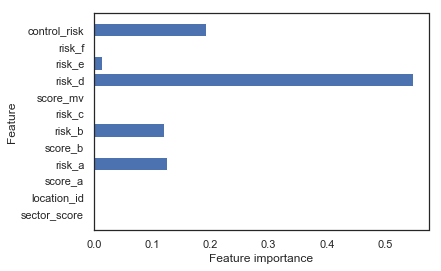

In [134]:
%matplotlib inline
def plot_feature_importances(model):
    n_features = x_train_class.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(x))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

Text(0, 0.5, 'Accuracy')

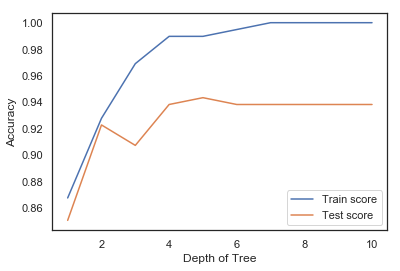

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(depth_range, train_score, label = 'Train score')
plt.plot(depth_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')

In [136]:
y_dtree_predict = dtree.predict(x_test_class)
y_dtree_train_predict = dtree.predict(x_train_class)
print('Train roc_auc_score: %.4f'%roc_auc_score(y_dtree_train_predict, y_train_class))
print('Test roc_auc_score: %.4f '%roc_auc_score(y_dtree_predict, y_test_class))

y_predicted = dtree.predict(x_test_class)
confusion = confusion_matrix(y_test_class, y_predicted)

print('\n Decision Tree on test data \n', confusion )

Train roc_auc_score: 1.0000
Test roc_auc_score: 0.9396 

 Decision Tree on test data 
 [[112   4]
 [  8  70]]


In [137]:
print(train_score[4])
print(test_score[4])

0.9896729776247849
0.9432989690721649


# Summary of Classification

In [138]:
report_table = [['knn', 'k = 10', knn.score(x_train_class, y_train_class), knn.score(x_test_class, y_test_class), roc_auc_score(y_knn_train_predict, y_train_class), roc_auc_score(y_knn_predict, y_test_class) ]]
report_table = report_table + [['Logistic Regression', 'C = 100', log_l1.score(x_train_class, y_train_class), log_l1.score(x_test_class, y_test_class), roc_auc_score(y_log_train_predict, y_train_class), roc_auc_score(y_log_predict, y_test_class)]]
report_table = report_table + [['LinearSVC', 'C = 10', clf.score(x_train_class, y_train_class), clf.score(x_test_class, y_test_class), roc_auc_score(y_linsvc_train_predict, y_train_class), roc_auc_score(y_linsvc_predict, y_test_class)]]
report_table = report_table + [['SVC', 'C = 100, gamma=0.1', grid_svc.score(x_train_class, y_train_class), grid_svc.score(x_test_class, y_test_class), roc_auc_score(y_svc_train_predict, y_train_class), roc_auc_score(y_svc_predict, y_test_class)]]
report_table = report_table + [['Decision Tree', 'max_depth= 3', dtree.score(x_train_class, y_train_class), dtree.score(x_test_class, y_test_class), roc_auc_score(y_dtree_train_predict, y_train_class), roc_auc_score(y_dtree_predict, y_test_class)]]

report_classification = pd.DataFrame(report_table,columns = ['Model Name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report_classification = pd.DataFrame(report_table,columns = ['Model Name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report_classification


,Model Name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 10,0.986231,0.953608,0.987136,0.964000
1,Logistic Regression,C = 100,0.993115,0.989691,0.992770,0.991525
2,LinearSVC,C = 10,0.850258,0.783505,0.972581,0.971545
3,SVC,"C = 100, gamma=0.1",0.998034,0.999116,0.972581,0.971545
4,Decision Tree,max_depth= 3,1.000000,0.938144,1.000000,0.939640


### Best classifier model is the Logistic Regressor
### This has an accuracy of 0.98961 with the L1 penalty at C=100

# Linear Models

## Linear Regression Normal Equation

R-squared score (training): 0.7789
R-squared score (test): 0.4314


Text(0.5, 0, 'RM')

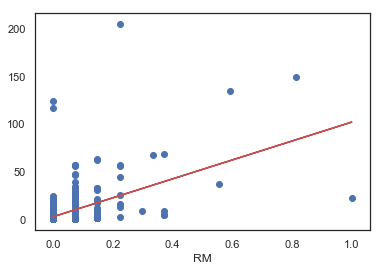

In [139]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train_reg, y_train_reg)

print('R-squared score (training): {:.4f}'
     .format(lreg.score(x_train_reg, y_train_reg)))
print('R-squared score (test): {:.4f}'
     .format(lreg.score(x_test_reg, y_test_reg)))

%matplotlib inline
import matplotlib.pyplot as plt

x_train_rm = x_train_reg[:,11].reshape(-1,1)
lreg.fit(x_train_rm, y_train_reg)
y_predict = lreg.predict(x_train_rm)

plt.plot(x_train_rm, y_predict, c = 'r')
plt.scatter(x_train_rm,y_train_reg)
plt.xlabel('RM')

## KNN regressor

In [140]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_knn.fit(x_train_reg, y_train_reg)
print("Best parameters: {}".format(grid_knn.best_params_))

print('Mean Train Score',grid_knn.cv_results_['mean_train_score'])
print('Mean Test Score',grid_knn.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_knn.score(x_train_reg, y_train_reg)))
print('R-squared score (test): {:.3f}'
     .format(grid_knn.score(x_test_reg, y_test_reg)))

Best parameters: {'n_neighbors': 4}
Mean Train Score [1.         0.87108842 0.79308979 0.72564629 0.68226394 0.63175206
 0.60431823 0.57544438 0.55850638 0.55189336 0.53739416 0.51782747
 0.50372178 0.49132711 0.48258749]
Mean Test Score [0.51850176 0.54491562 0.54554262 0.55721521 0.55023872 0.54159271
 0.48362004 0.48835211 0.49470927 0.45992837 0.46296482 0.47664074
 0.47226218 0.46698533 0.46505208]
R-squared score (training): 0.761
R-squared score (test): 0.130


Train Score k-3: 0.8316368053723135
Train Score k-4: 0.7613069816319613
Test Score k-3: 0.1597751627149494
Test Score k-4: 0.12976319276109838


Text(0, 0.5, 'RSQ')

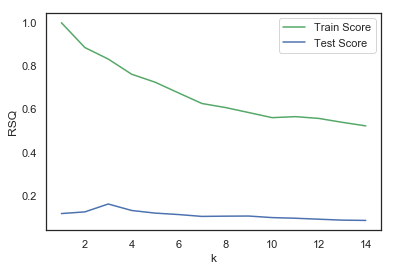

In [141]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train_reg, y_train_reg)
    train_score_array.append(knn_reg.score(x_train_reg, y_train_reg))
    test_score_array.append(knn_reg.score(x_test_reg, y_test_reg))

print('Train Score k-3:',train_score_array[2])
print('Train Score k-4:',train_score_array[3])
print('Test Score k-3:',test_score_array[2])
print('Test Score k-4:',test_score_array[3])
    
x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('RSQ')


## Ridge

In [142]:
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_ridge.fit(x_train_reg, y_train_reg)

print("Best parameters: {}".format(grid_ridge.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_ridge.score(x_train_reg, y_train_reg)))
print('R-squared score (test): {:.4f}'
     .format(grid_ridge.score(x_test_reg, y_test_reg)))

Best parameters: {'alpha': 10}
R-squared score (training): 0.5712
R-squared score (test): 0.2791


Text(0.5, 0, '$\\alpha$')

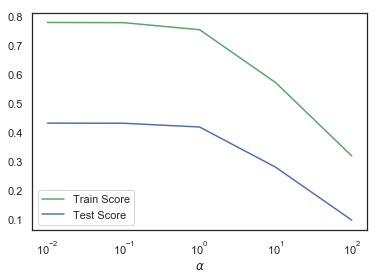

In [143]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train_reg,y_train_reg)
    train_score_list.append(ridge.score(x_train_reg,y_train_reg))
    test_score_list.append(ridge.score(x_test_reg, y_test_reg))
    
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [144]:
print (x_range)
print(train_score_list)
print(test_score_list)

[0.01, 0.1, 1, 10, 100]
[0.7788739391486147, 0.7782849977994811, 0.7539203410062032, 0.5712269975595887, 0.3182321396434239]
[0.4313733483392206, 0.43093782943526204, 0.4180323502874692, 0.2790857444567325, 0.09639360289898202]


## Lasso

Best parameters: {'alpha': 0.1, 'max_iter': 10000}
R-squared score (training): 0.7569
R-squared score (test): 0.3404


Text(0.5, 0, 'RM')

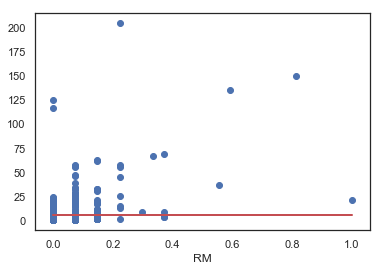

In [145]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}

grid_lasso = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_lasso.fit(x_train_reg, y_train_reg)

print("Best parameters: {}".format(grid_lasso.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_lasso.score(x_train_reg, y_train_reg)))
print('R-squared score (test): {:.4f}'
     .format(grid_lasso.score(x_test_reg, y_test_reg)))

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = x_train_reg[:,11].reshape(-1,1)
X_test_rm = x_test_reg[:,11].reshape(-1,1)
grid_lasso.fit(X_train_rm, y_train_reg)
y_predict = grid_lasso.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train_reg)
plt.xlabel('RM')

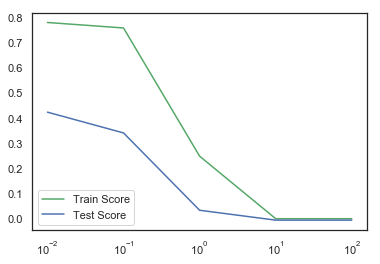

In [146]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train_reg,y_train_reg)
    train_score_list.append(lasso.score(x_train_reg,y_train_reg))
    test_score_list.append(lasso.score(x_test_reg, y_test_reg))
    
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)

## Polynomial Regression

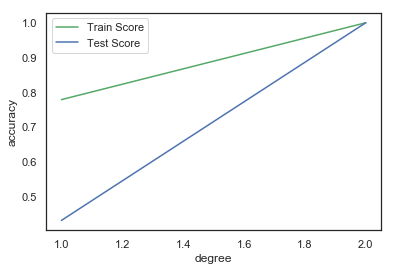

In [147]:
from  sklearn.preprocessing  import PolynomialFeatures

preg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train_reg)
    x_test_poly = poly.transform(x_test_reg)
    preg.fit(x_train_poly, y_train_reg)
    train_score_list.append(preg.score(x_train_poly, y_train_reg))
    test_score_list.append(preg.score(x_test_poly, y_test_reg))
    
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [148]:
print(train_score_list)
print(test_score_list)

[0.7788807458845337, 0.9999972687635662]
[0.4314018618196952, 0.9999998727289102]


Text(0.5, 0, 'RM')

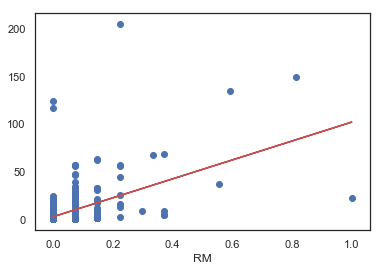

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

x_train_poly = x_train_reg[:,11].reshape(-1,1)
x_test_poly = x_test_reg[:,11].reshape(-1,1)
preg.fit(x_train_poly, y_train_reg)
y_predict = preg.predict(x_train_poly)

plt.plot(x_train_poly, y_predict, c = 'r')
plt.scatter(x_train_poly,y_train_reg)
plt.xlabel('RM')

## SVM simple regressor

In [150]:
from sklearn.svm import LinearSVR
param_grid = {'C':[0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_linsvm = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_linsvm.fit(x_train_reg, y_train_reg)

print("Best parameters: {}".format(grid_linsvm.best_params_))

print('Mean Train Score',grid_linsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_linsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_linsvm.score(x_train_class, y_train_class)))
print('R-squared score (test): {:.3f}'
     .format(grid_linsvm.score(x_test_class, y_test_class)))

Best parameters: {'C': 10, 'epsilon': 1}
Mean Train Score [0.13843591 0.13695351 0.15480997 0.28822358 0.30061365 0.27515172
 0.53487093 0.55742212 0.57813299]
Mean Test Score [0.20517044 0.20592406 0.20478735 0.39144987 0.40289415 0.28275105
 0.54551093 0.57197959 0.51423913]
R-squared score (training): -345.154
R-squared score (test): -1257.972


## SVM with kernel regressor

In [151]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 10]}
grid_kernelsvm = GridSearchCV(SVR(), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(x_train_reg, y_train_reg)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))

print('Train score: {:.4f}'.format(grid_kernelsvm.score(x_train_reg,y_train_reg)))
print('Test score: {:.4f}'.format(grid_kernelsvm.score(x_test_reg, y_test_reg)))
print('Mean Train Score',grid_kernelsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_kernelsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(x_train_reg, y_train_reg)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(x_test_reg, y_test_reg)))

Best parameters: {'C': 100, 'gamma': 1}
Train score: 0.9434
Test score: 0.0821
Mean Train Score [-0.09707575 -0.08216573 -0.06472908 -0.08930909 -0.08930909 -0.07805956
  0.00828004  0.05292522 -0.04975383 -0.04975383  0.02060984  0.1706622
  0.19970906  0.07510438  0.07510438  0.17966201  0.33793842  0.46930736
  0.3487068   0.3487068   0.34664443  0.68982664  0.94236078  0.94364656
  0.94364656]
Mean Test Score [-0.1347392  -0.11054334 -0.08148615 -0.12244709 -0.12244709 -0.10432692
  0.028178    0.1012174  -0.06287241 -0.06287241  0.04546715  0.25264461
  0.29919137  0.09943929  0.09943929  0.2591167   0.43597649  0.51614869
  0.28757424  0.28757424  0.44977632  0.67355435  0.78262695  0.39743826
  0.39743826]
R-squared score (training): 0.943
R-squared score (test): 0.082


### Best regression model is the Polynomial Regressor
### This has a an accuracy of 0.99 at degree=2